# Analysis of Democratic Primary Polling, 2019

Data taken from FiveThirtyEight's aggregation of polls for the 2019 primary.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_raw = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv')

In [3]:
data_raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,114541,63060,2020,Iowa,1102,Emerson College,43,7News,Emerson College,88.0,...,False,12/10/19 21:02,NaN,http://emersonpolling.com/2019/12/11/iowa-2020...,primary,DEM,Booker,13287,Cory A. Booker,3.6
1,114541,63060,2020,Iowa,1102,Emerson College,43,7News,Emerson College,88.0,...,False,12/10/19 21:02,NaN,http://emersonpolling.com/2019/12/11/iowa-2020...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.3
2,114541,63060,2020,Iowa,1102,Emerson College,43,7News,Emerson College,88.0,...,False,12/10/19 21:02,NaN,http://emersonpolling.com/2019/12/11/iowa-2020...,primary,DEM,Sanders,13257,Bernard Sanders,21.7
3,114541,63060,2020,Iowa,1102,Emerson College,43,7News,Emerson College,88.0,...,False,12/10/19 21:02,NaN,http://emersonpolling.com/2019/12/11/iowa-2020...,primary,DEM,Warren,13258,Elizabeth Warren,12.2
4,114541,63060,2020,Iowa,1102,Emerson College,43,7News,Emerson College,88.0,...,False,12/10/19 21:02,NaN,http://emersonpolling.com/2019/12/11/iowa-2020...,primary,DEM,Buttigieg,13345,Pete Buttigieg,17.9


# Tasks

### Clean Data
(can fiddle with how to clean in different ways)

1. get a feature for each candidate's percentage for each poll (question id)
2. other features can include many features in the raw data sans the candidate names and percentages. e.g. poll_id, rating, poll name, etc.


### Analyze Data

## Cleaning Process

First, work on step 1 from above cell.


In [4]:
question_ids = data_raw['question_id'].unique()

In [5]:
data_clean = pd.DataFrame(index = question_ids, 
                            columns = ['start_date','end_date','sample_size','population','population_full',
                                       'pollster','pollster_id','pollster_grade', 
                                       'Buttigieg-pct','Biden-pct','Sanders-pct','Warren-pct'])

for q_id in question_ids:
    data_clean.loc[q_id]['start_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['start_date']
    data_clean.loc[q_id]['end_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['end_date']
    data_clean.loc[q_id]['pollster'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster']
    data_clean.loc[q_id]['pollster_id'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster_id']
    data_clean.loc[q_id]['sample_size'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['sample_size']
    data_clean.loc[q_id]['population_full'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population_full']
    data_clean.loc[q_id]['population'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population']
    data_clean.loc[q_id]['pollster_grade'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['fte_grade']

data_clean['Buttigieg-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Buttigieg']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Buttigieg']['question_id'],
                      name = 'Buttigieg-pct')

data_clean['Biden-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Biden']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Biden']['question_id'],
                      name = 'Biden-pct')

data_clean['Sanders-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Sanders']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Sanders']['question_id'],
                      name = 'Sanders-pct')

data_clean['Warren-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Warren']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Warren']['question_id'],
                      name = 'Warren-pct')


In [6]:
data_clean.head()

,start_date,end_date,sample_size,population,population_full,pollster,pollster_id,pollster_grade,Buttigieg-pct,Biden-pct,Sanders-pct,Warren-pct
114541,12/7/19,12/10/19,325,lv,lv-d,Emerson College,1102,A-,17.9,23.3,21.7,12.2
114574,12/7/19,12/10/19,422,lv,lv-r,YouGov,568,B-,NaN,NaN,NaN,NaN
114575,12/7/19,12/10/19,497,lv,lv-d,YouGov,568,B-,11.0,26.0,16.0,21.0
114517,12/4/19,12/9/19,665,rv,rv-d,Quinnipiac University,396,B+,9.0,29.0,17.0,15.0
114818,12/4/19,12/9/19,537,lv,lv-r,SSRS,1361,A/B,NaN,NaN,NaN,NaN


In [7]:
data_clean.describe()

,Buttigieg-pct,Biden-pct,Sanders-pct,Warren-pct
count,696.000000,767.000000,761.000000,765.000000
mean,6.367213,29.750965,17.343548,15.478314
std,4.012734,8.682883,6.003552,8.219689
min,0.000000,0.000000,0.000000,1.000000
25%,4.000000,25.000000,14.000000,10.000000
50%,5.000000,29.000000,16.000000,14.500000
75%,8.000000,33.000000,19.500000,19.000000
max,26.000000,71.000000,44.000000,82.000000


In [8]:
data_clean.start_date = data_clean.start_date.astype("datetime64")
data_clean.end_date = data_clean.end_date.astype("datetime64")

In [9]:
data_clean.start_date.head()

114541   2019-12-07
114574   2019-12-07
114575   2019-12-07
114517   2019-12-04
114818   2019-12-04
Name: start_date, dtype: datetime64[ns]

## Data Analysis

Now that we have a clean data set, we can do some plotting and analysis

First, we show a plot of how the different candidates are doing as a function of time.
From the results, we can see that it might be useful to do some smoothing...

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

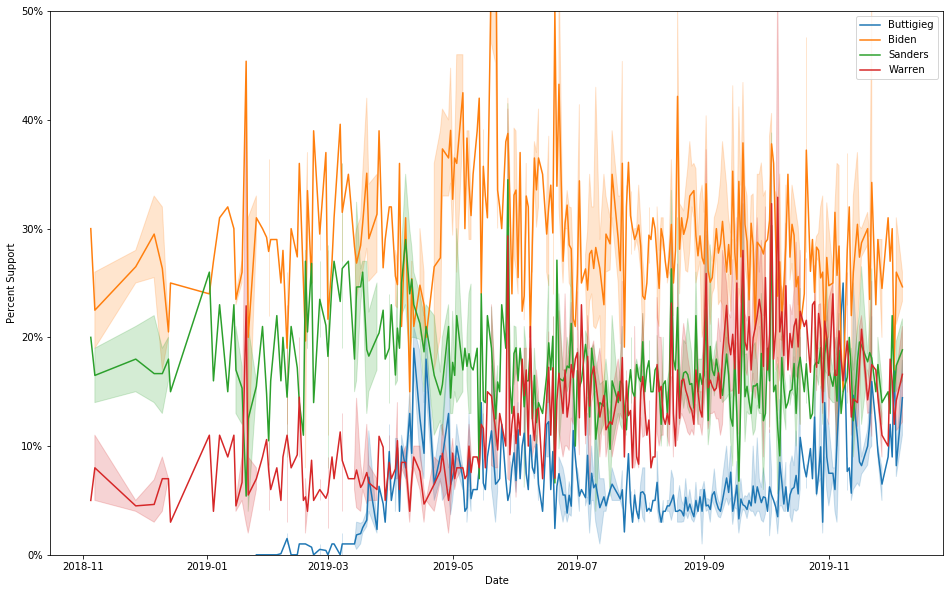

In [10]:
%matplotlib inline

plt.figure(figsize=(16,10))

sns.lineplot(x = 'start_date', y = 'Buttigieg-pct', data=data_clean, label = "Buttigieg")
sns.lineplot(x = 'start_date', y = 'Biden-pct', data=data_clean, label = "Biden")
sns.lineplot(x = 'start_date', y = 'Sanders-pct', data=data_clean, label = "Sanders")
sns.lineplot(x = 'start_date', y = 'Warren-pct', data=data_clean, label = "Warren")

#plt.xlim([np.datetime64('2019-07'),np.datetime64('2020-01')])

plt.ylabel('Percent Support')
plt.ylim(0,50)
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
new_labels
plt.yticks(yticks[0],new_labels)

plt.xlabel('Date')


### Smoothing

#### Polynomial Regression

In [11]:
data_clean_drop = data_clean.dropna(axis = 0)

In [12]:
data_clean_drop['date_ordinal'] = pd.to_datetime(data_clean_drop['start_date']).apply(lambda start_date: start_date.toordinal())
data_clean_drop[['start_date','date_ordinal']].head()

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start_date,date_ordinal
114541,2019-12-07,737400
114575,2019-12-07,737400
114517,2019-12-04,737397
114828,2019-12-04,737397
114381,2019-12-04,737397


Text(0.5, 1.0, 'Democratic Primary - Candidate Support')

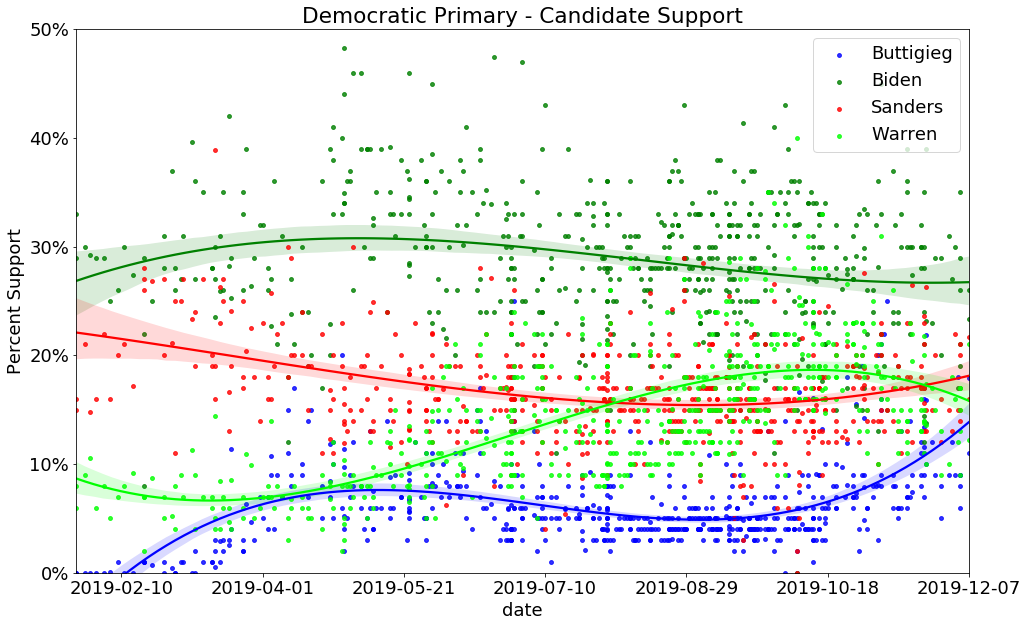

In [13]:
import warnings
import datetime
warnings.simplefilter('ignore', np.RankWarning)
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(16,10))
deg_order =20

sns.regplot(x ='date_ordinal', y = data_clean_drop['Buttigieg-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Buttigieg",color = 'blue')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Biden-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Biden", color = 'green')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Sanders-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Sanders",color='red')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Warren-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Warren",color = (0.0,1,0.0))



plt.legend()
plt.xlabel('date')
plt.xlim(data_clean_drop['date_ordinal'].min() - 1, data_clean_drop['date_ordinal'].max() + 1)#new_labels = [datetime.date.fromordinal(int(item)) for item in plt.xticks()]

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean_drop['start_date'].min(),data_clean_drop['start_date'].max())

plt.ylabel('Percent Support')
plt.ylim(0,50)
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
plt.yticks(yticks[0],new_labels)

plt.title('Democratic Primary - Candidate Support')


### Other ideas

Can use machine learning to predict poll biases for each candidate, and reweight based on how each poll favors a candidate

e.g. if Warren does 5 points better than average on a particular poll, machine learning can determine that, and then I can correct for it